<a href="https://colab.research.google.com/github/LaisST/FIAP_202501_HandsOn_data_analytics/blob/main/Fase_2_Aula03_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados EDA

## INTRODUÇÃO

### Qual o problema a ser resolvido?


Digamos que você foi contratado pela Spotify como um ciêntista de dados, e uma grande dor atual que eles possuem é de conseguir entender as características e comportamentos que as músicas dos artistas/bandas Top Artists causam em seus usuários.

Todo grande projeto de ciência de dados, nasce a partir de uma dor/problema a se resolver! Então após fazer o entendimento inicial sobre o projeto a ser desenvolvido e o ganho para a empresa, você começou a investigar em sua base de dados. E o primeiro caso que você decidiu a analisar é a famosa banda de rock Rolling Stones.
ANÁLISE EXPLORATÓRIA

### O que é análise explorátória?


A análise exploratória é uma etapa essencial no dia a dia de um ciêntista de dados, pois é um processo de descoberta de insights e entendimento dos seus dados. Com uma boa análise exploratória conseguimos descobrir têndencias, padrões e possíveis relações entre as variáveis.

### Porque preciso entender meus dados?


Quando entendemos como os nossos dados se comportam, conseguimos identificar as nossas limitações atuais de negócio, possíveis erros ou inconsistências no cadastro dos dados e diversos outros insights, que caso não sejam tratados poderam trazer resultados inconclusíveis ou até mesmo má tomadas de decisões para sua empresa.

Em resumo, entender seus dados é fundamental para qualquer trabalho com dados, pois isso ajuda garantir que você consiga decidir quais variáveis para seu projeto são importantes e confiáveis, e que os resultados sejam comunicados de forma clara e compreensível.

## Preparação dos dados

In [1]:
# Importar bibliotecas
import pandas as pd

In [2]:
df_banda = pd.read_excel('/content/dataset_rolling_stones.xlsx')
df_banda.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [3]:
# Uma das primeiras etapas é saber os tipos de dados que temos na base
df_banda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [4]:
# Saber o tamanho da base
df_banda.shape
#Forma de printar mais legível
print(f'A base contém {df_banda.shape[0]} linhas e {df_banda.shape[1]} colunas.')

A base contém 1610 linhas e 15 colunas.


In [5]:
# Saber o inicio da banda
print(f"Data inicial: {df_banda['release_date'].min()}")

Data inicial: 1964-04-16 00:00:00


In [6]:
# Saber até quando eles lançaram músicas novas
print(f"Data Final: {df_banda['release_date'].max()}")

Data Final: 2022-06-10 00:00:00


In [7]:
# Conferir se tem dados nulos
df_banda.isnull().sum()

,0
name,0
album,0
release_date,0
track_number,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
liveness,0
loudness,0


In [8]:
# Consultar dados duplicados
df_banda.duplicated().sum()

np.int64(6)

In [9]:
# Consultar dados duplicados
df_banda[df_banda.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


Nesse caso não precisa excluir os dados duplicados, pois se trata de músicas diferentes

## Análise Exploratória

In [10]:
# Consultar estatísticas descritivas
df_banda.describe().T

,count,mean,min,25%,50%,75%,max,std
release_date,1610,1992-04-23 12:57:14.534161536,1964-04-16 00:00:00,1970-09-04 00:00:00,1986-03-24 00:00:00,2017-12-01 00:00:00,2022-06-10 00:00:00,NaN
track_number,1610.0,8.613665,1.0,4.0,7.0,11.0,47.0,6.56022
acousticness,1610.0,0.250475,0.000009,0.05835,0.183,0.40375,0.994,0.227397
danceability,1610.0,0.46886,0.104,0.36225,0.458,0.578,0.887,0.141775
energy,1610.0,0.792352,0.141,0.674,0.8485,0.945,0.999,0.179886
instrumentalness,1610.0,0.16417,0.0,0.000219,0.01375,0.179,0.996,0.276249
liveness,1610.0,0.49173,0.0219,0.153,0.3795,0.89375,0.998,0.3491
loudness,1610.0,-6406.640075,-24408.0,-8829.5,-6179.0,-4254.75,-2.31,3474.285941
speechiness,1610.0,0.069512,0.0232,0.0365,0.0512,0.0866,0.624,0.051631
tempo,1610.0,114078.725261,65.99,98996.5,120319.0,140853.75,216304.0,46196.602233


In [11]:
# Converter a coluna duration_ms em minutos para facilitar a leitura
df_banda['Duracao_minutos'] = df_banda['duration_ms'] / 60000
df_banda.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Duracao_minutos
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [12]:
# Consultar estatísticas descritivas novamente
df_banda.describe().T

,count,mean,min,25%,50%,75%,max,std
release_date,1610,1992-04-23 12:57:14.534161536,1964-04-16 00:00:00,1970-09-04 00:00:00,1986-03-24 00:00:00,2017-12-01 00:00:00,2022-06-10 00:00:00,NaN
track_number,1610.0,8.613665,1.0,4.0,7.0,11.0,47.0,6.56022
acousticness,1610.0,0.250475,0.000009,0.05835,0.183,0.40375,0.994,0.227397
danceability,1610.0,0.46886,0.104,0.36225,0.458,0.578,0.887,0.141775
energy,1610.0,0.792352,0.141,0.674,0.8485,0.945,0.999,0.179886
instrumentalness,1610.0,0.16417,0.0,0.000219,0.01375,0.179,0.996,0.276249
liveness,1610.0,0.49173,0.0219,0.153,0.3795,0.89375,0.998,0.3491
loudness,1610.0,-6406.640075,-24408.0,-8829.5,-6179.0,-4254.75,-2.31,3474.285941
speechiness,1610.0,0.069512,0.0232,0.0365,0.0512,0.0866,0.624,0.051631
tempo,1610.0,114078.725261,65.99,98996.5,120319.0,140853.75,216304.0,46196.602233


In [13]:
# Análisar a média de duração em minutos dos albuns
df_banda.groupby('album')['Duracao_minutos'].mean()

,Duracao_minutos
album,
12 X 5,2.682068
12 x 5,2.682772
A Bigger Bang (2009 Re-Mastered),4.016356
A Bigger Bang (Live),5.176630
Aftermath,3.899185
...,...
Undercover,4.492750
Undercover (2009 Re-Mastered),4.497595
Voodoo Lounge (Remastered 2009),4.118779


In [14]:
# Quais músicas tem a menor e a maior duração em minutos?
menor_duracao = df_banda['Duracao_minutos'].min()
maior_duracao = df_banda['Duracao_minutos'].max()

Musica_menor_duracao = df_banda[df_banda['Duracao_minutos'] == menor_duracao]['name'].iloc[0]
Musica_maior_duracao = df_banda[df_banda['Duracao_minutos'] == maior_duracao]['name'].iloc[0]

print(f'A Música do Rolling Stones com a menor duração é a {Musica_menor_duracao} do album {df_banda[df_banda['Duracao_minutos'] == menor_duracao]['album'].iloc[0]} com {menor_duracao} minutos.')
print(f'A Música do Rolling Stones com a maior duração é a {Musica_maior_duracao} do album {df_banda[df_banda['Duracao_minutos'] == maior_duracao]['album'].iloc[0]} com {maior_duracao} minutos.')

#É possível criar as variaveis para localizar o dado ou aplicar diretamente na função print.
#Uma boa prática é criar a váriavel


A Música do Rolling Stones com a menor duração é a Show Intro - Live do album Live 1965: Music From Charlie Is My Darling (Live From England/1965) com 0.35 minutos.
A Música do Rolling Stones com a maior duração é a Miss You - Live do album Bridges To Bremen (Live) com 16.364433333333334 minutos.


## Gráficos

In [15]:
import matplotlib.pyplot as plt

In [16]:
df_maior_duracao_musica = df_banda.groupby('album')['Duracao_minutos'].mean().sort_values(ascending=False)
df_maior_duracao_musica

,Duracao_minutos
album,
Havana Moon (Live),6.632819
Bridges To Bremen (Live),6.332265
Jamming With Edward,6.042794
Live At The Checkerboard Lounge,6.009647
Totally Stripped - Paris (Live),5.947430
...,...
Out Of Our Heads (UK),2.464643
Out Of Our Heads (UK Sequence),2.449274
December's Children (and everybody's),2.408976


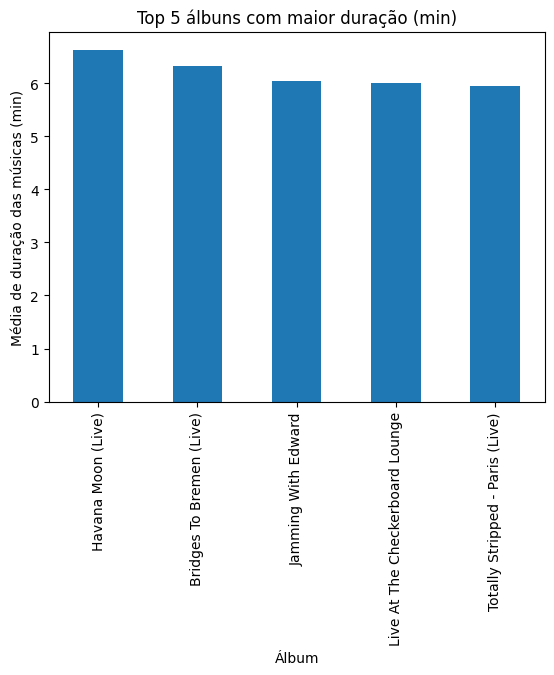

In [17]:
# Criar o gráfico de barras com os albuns com maior duração em minutos.
df_maior_duracao_musica.head(5).plot(kind='bar')
plt.xlabel("Álbum")
plt.ylabel("Média de duração das músicas (min)")
plt.title("Top 5 álbuns com maior duração (min)")
plt.show()

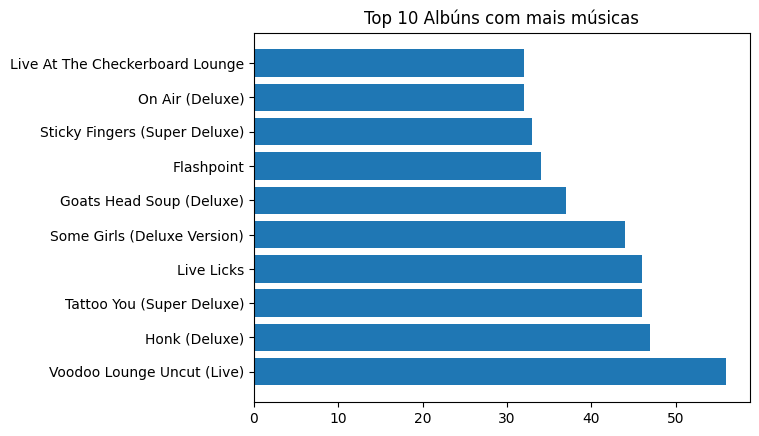

In [18]:
#Criar gráfico horizontal
top_albuns = df_banda['album'].value_counts().head(10)
plt.barh(top_albuns.index, top_albuns.values)
plt.title('Top 10 Albúns com mais músicas')
plt.show()

In [19]:
top_albuns

,count
album,
Voodoo Lounge Uncut (Live),56
Honk (Deluxe),47
Tattoo You (Super Deluxe),46
Live Licks,46
Some Girls (Deluxe Version),44
Goats Head Soup (Deluxe),37
Flashpoint,34
Sticky Fingers (Super Deluxe),33
On Air (Deluxe),32


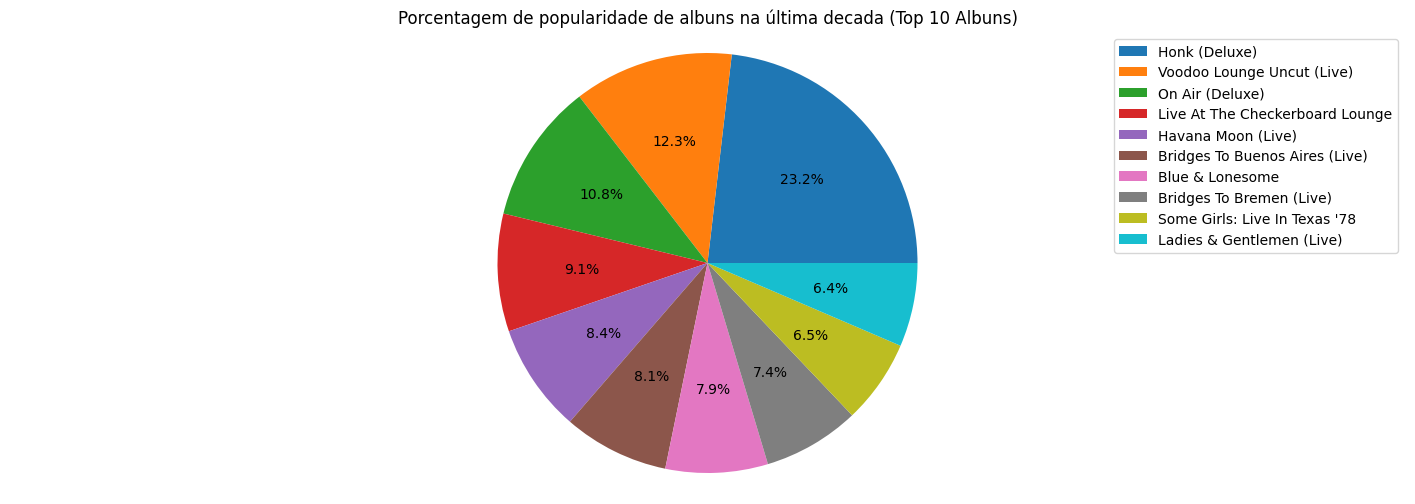

In [20]:
# Identificar o range de datas
df_ultima_decada = df_banda[df_banda['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

# Criar o agrupamento
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

#Calcular % da popularidade
total_popularidade = df_por_album.sum()
df_porcentagem = (df_por_album / total_popularidade) * 100

# Criar lista para labels e tamanho
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title('Porcentagem de popularidade de albuns na última decada (Top 10 Albuns)')
plt.legend(labels, loc='best')
plt.show()


## Outliers

In [21]:
# Importar bibliotecas
import seaborn as sns

In [22]:
df_banda.head(3)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Duracao_minutos
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000


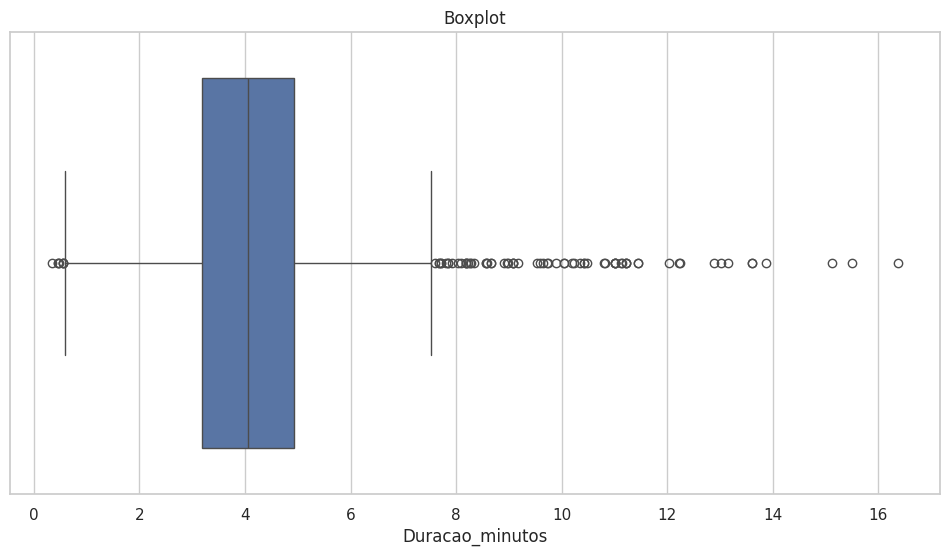

In [23]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(12,6))

sns.boxplot(x='Duracao_minutos', data=df_banda)
axes.set_title('Boxplot')

plt.show()

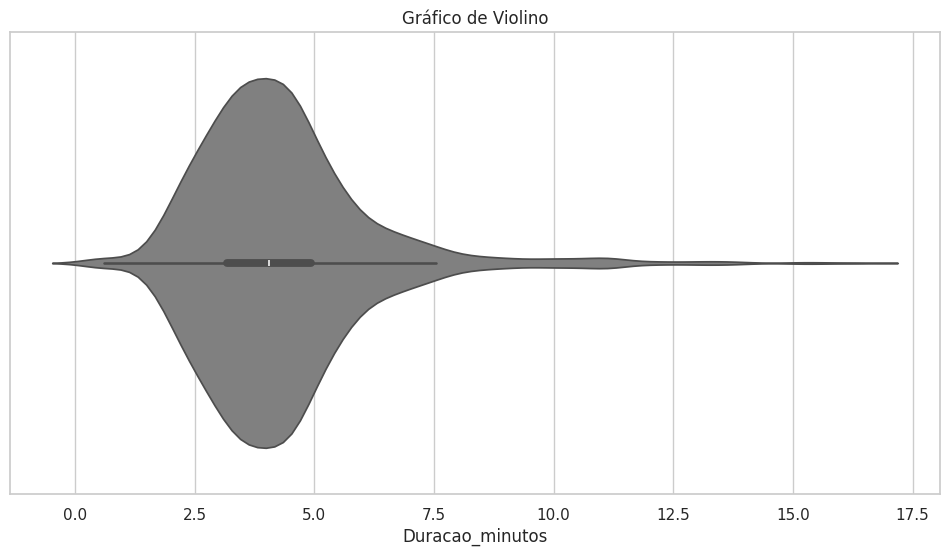

In [24]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x='Duracao_minutos', data=df_banda, color='Gray')
axes.set_title('Gráfico de Violino')

plt.show()

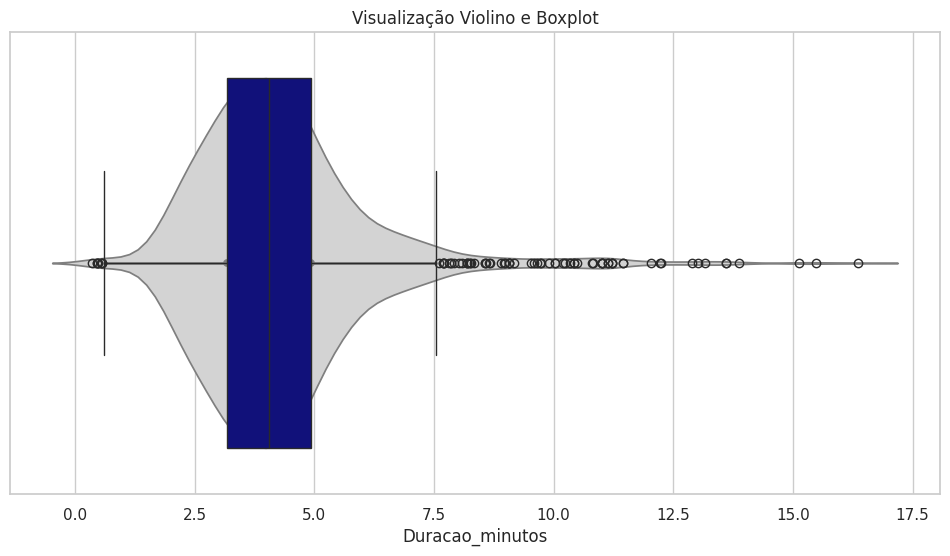

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='Duracao_minutos', data=df_banda, ax=ax, color='lightgray')
sns.boxplot(x='Duracao_minutos', data=df_banda, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Violino e Boxplot')
plt.show()



In [26]:
df_banda.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Duracao_minutos
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [27]:
# Criar uma função para identificar se a música é ao vivo.
def classifica_musica_ao_vivo(df):
  if df_banda['liveness'] >= 0.8:
    return True
  else:
    return False

In [28]:
df_banda['ao_vivo'] = df_banda['ao_vivo'] = df_banda['liveness'] >= 0.8
df_banda.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Duracao_minutos,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [29]:
df_banda.groupby('ao_vivo')['ao_vivo'].count()

,ao_vivo
ao_vivo,
False,1112
True,498


In [43]:
df_musica_studio = df_banda[df_banda['ao_vivo'] == False]
df_musica_ao_vivo = df_banda[df_banda['ao_vivo'] == True]

In [44]:
# Quantidade de musicas ao vivo e gravadas em studio
print(f'Existem {df_musica_studio.shape[0]} musicas gravadas em studio')
print(f'Existem {df_musica_ao_vivo.shape[0]} musicas gravadas ao vivo')

Existem 1112 musicas gravadas em studio
Existem 498 musicas gravadas ao vivo


### Histograma

In [45]:
df_musica_studio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112 entries, 5 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1112 non-null   object        
 1   album             1112 non-null   object        
 2   release_date      1112 non-null   datetime64[ns]
 3   track_number      1112 non-null   int64         
 4   acousticness      1112 non-null   float64       
 5   danceability      1112 non-null   float64       
 6   energy            1112 non-null   float64       
 7   instrumentalness  1112 non-null   float64       
 8   liveness          1112 non-null   float64       
 9   loudness          1112 non-null   float64       
 10  speechiness       1112 non-null   float64       
 11  tempo             1112 non-null   float64       
 12  valence           1112 non-null   float64       
 13  popularity        1112 non-null   int64         
 14  duration_ms       1112 non-nu

In [46]:
df_studio = df_musica_studio.groupby('album')['loudness'].sum()
df_ao_vivo = df_musica_ao_vivo.groupby('album')['loudness'].sum()

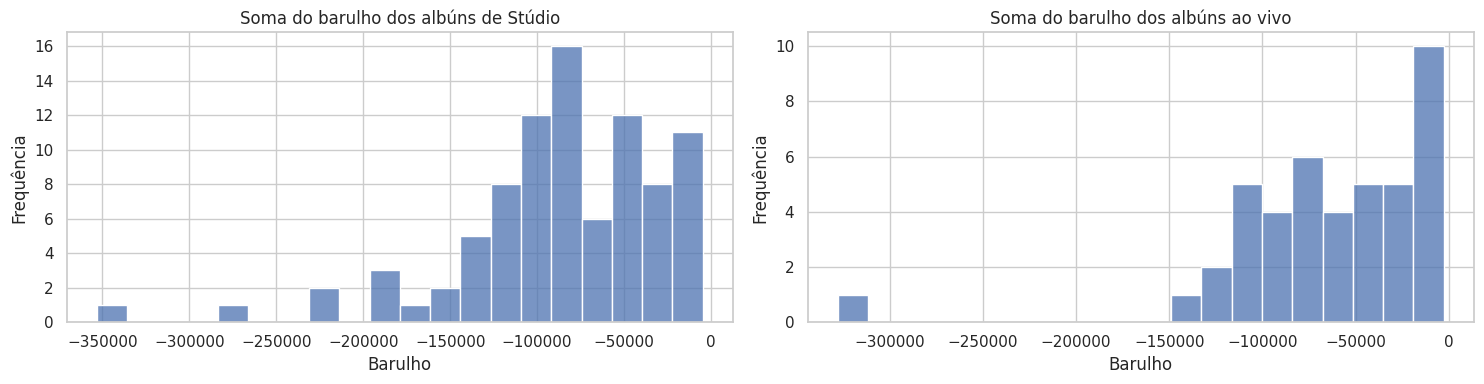

In [47]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title('Soma do barulho dos albúns de Stúdio')
axes[0].set_xlabel('Barulho')
axes[0].set_ylabel('Frequência')

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title('Soma do barulho dos albúns ao vivo')
axes[1].set_xlabel('Barulho')
axes[1].set_ylabel('Frequência')

fig.tight_layout()
plt.show()

### Densidade

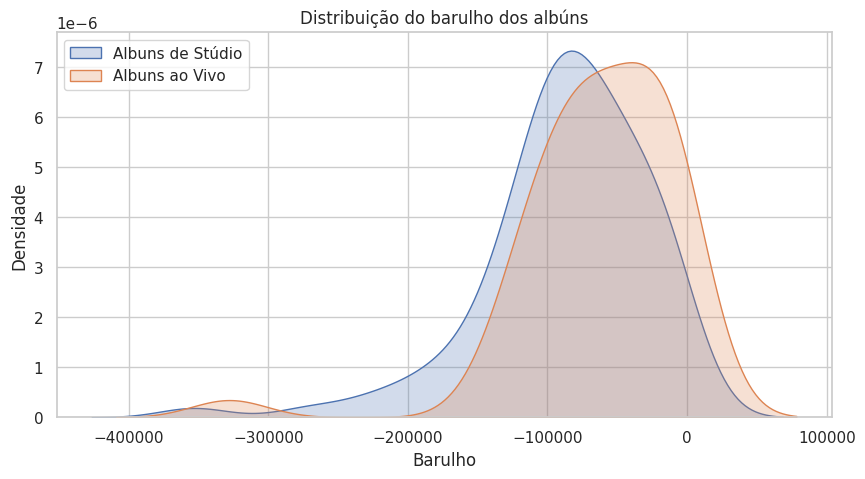

In [48]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_studio, label='Albuns de Stúdio', fill=True)
sns.kdeplot(data=df_ao_vivo, label='Albuns ao Vivo', fill=True)

plt.title('Distribuição do barulho dos albúns')
plt.xlabel('Barulho')
plt.ylabel('Densidade')
plt.legend()

plt.show()

### Teste Estatístico

In [36]:
# import da biblioteca para teste estatistico
from scipy.stats import shapiro

In [49]:
# Criação dos teste de normalidade para validação Stúdio
stat, p = shapiro(df_studio)
print(f'Soma do barulho dos albúns de stúdio: ')
print(f'Estatítica de teste: {stat:.4f}, valor p: {p}')

if p > 0.05:
  print('Não há evidência suficiente para rejeitar a hipótese de normalidade')
else:
  print('A hipótese de normalidade é rejeitada')

Soma do barulho dos albúns de stúdio: 
Estatítica de teste: 0.8958, valor p: 3.2961810837731026e-06
A hipótese de normalidade é rejeitada


In [38]:
# Criação dos teste de normalidade para validação Ao Vivo
stat, p = shapiro(df_ao_vivo)
print(f'Soma do barulho dos albúns AO Vivo: ')
print(f'Estatítica de teste: {stat:.4f}, valor p: {p}')

if p > 0.05:
  print('Não há evidência suficiente para rejeitar a hipótese de normalidade')
else:
  print('A hipótese de normalidade é rejeitada')

Soma do barulho dos albúns AO Vivo: 
Estatítica de teste: 0.7913, valor p: 2.3506009149709294e-06
A hipótese de normalidade é rejeitada


In [40]:
# Teste para comprovar se a distribuição é igual
# Importar biblioteca
from scipy.stats import mannwhitneyu

In [50]:
# Pegar uma amostra aleatoria
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative='less')

print(f'Estatística de teste U: {stat}')
print(f'Valor p: {p}')

alpha = 0.05
if p < alpha:
  print('Diferença estatisticamente significante')
else:
  print('Não há diferença estatisticamente significante')

Estatística de teste U: 1367.0
Valor p: 0.0050727361177996585
Diferença estatisticamente significante


In [51]:
media_por_album = df_banda.groupby('album')['valence'].mean().reset_index()

media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})

media_por_album['sentimento'] = ['positivo' if v > 0.6 else 'negativo' for v in media_por_album['media_valence']]

media_por_album.groupby('sentimento')['sentimento'].count()


,sentimento
sentimento,
negativo,38
positivo,52


In [54]:
df_resultado_final = pd.merge(df_banda, media_por_album, on = 'album')
df_resultado_final.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Duracao_minutos,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True,0.27117,negativo
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True,0.27117,negativo
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True,0.27117,negativo


### Correlação

In [56]:
matriz_correlacao = df_resultado_final.corr(numeric_only=True)

correlacao_sentimento = matriz_correlacao['media_valence']

display(correlacao_sentimento)

,media_valence
track_number,-0.115007
acousticness,0.015491
danceability,0.492945
energy,-0.347447
instrumentalness,0.133741
liveness,-0.571749
loudness,-0.229543
speechiness,-0.416005
tempo,-0.028887
valence,0.603258


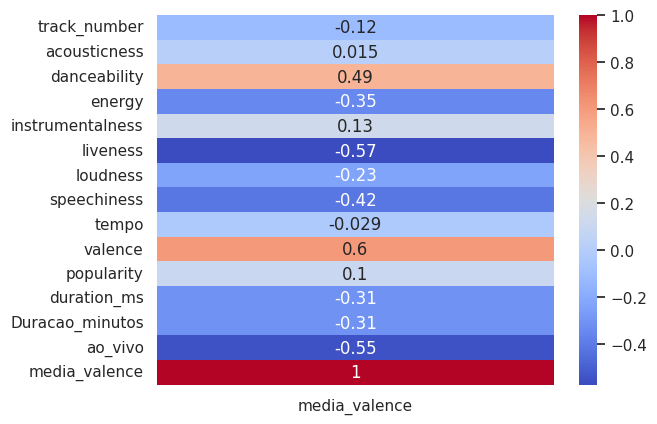

In [59]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm')
plt.show()


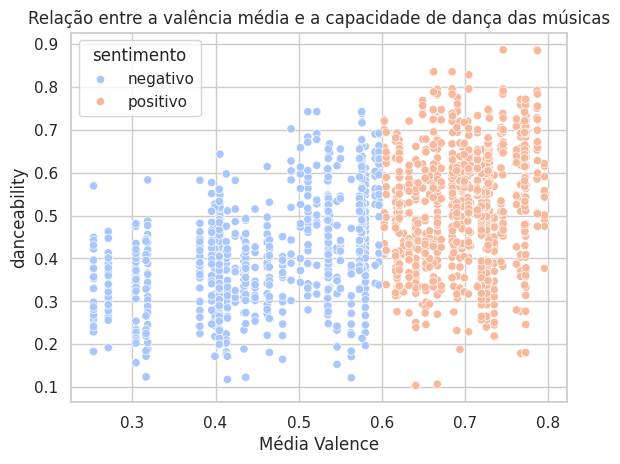

In [60]:
sns.scatterplot(x='media_valence', y='danceability', hue='sentimento', data=df_resultado_final, palette='coolwarm')
plt.title('Relação entre a valência média e a capacidade de dança das músicas')
plt.xlabel('Média Valence')
plt.ylabel('danceability')

plt.show()

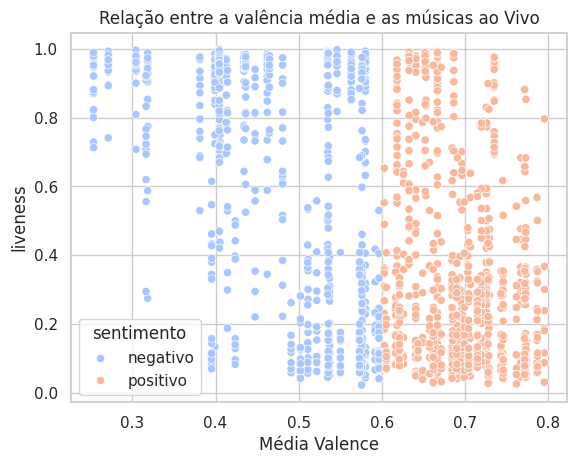

In [61]:
sns.scatterplot(x='media_valence', y='liveness', hue='sentimento', data=df_resultado_final, palette='coolwarm')
plt.title('Relação entre a valência média e as músicas ao Vivo')
plt.xlabel('Média Valence')
plt.ylabel('liveness')

plt.show()